In [1]:
#Install packages:
import numpy as np
import matplotlib as plt
import pandas as pd
import matplotlib.patches as mpatches

import requests
import math
import csv

In [2]:
#open the screened results in a dataframe:
df = pd.read_csv('../thesis/GoogleDataset_results_GoogleDataset.csv')

In [3]:
df

,Dataset used,"Include (0), Exclude (1), Duplicate (2)",Title,Dataset updated,Authors,Description,Content,Acknowledgements
0,NaN,1,[BEGINNER] Chest X-Ray Image Classification,"feb. 22, 2022",NaN,NaN,NaN,NaN
1,NaN,2,3 kinds of Pneumonia,"May 30, 2022",Artsiom Kolas,NaN,NaN,NaN
2,NaN,1,Alignments conducted between the MV X-ray beam...,"feb. 24, 2016",Takeshi Kamomae; Hajime Monzen; Shinichi Nakay...,NaN,NaN,NaN
3,"India, COVID-19 image data collection",0,Augmented COVID-19 X-ray Images Dataset,"mar. 26, 2020",Ali Mohammad Alqudah,NaN,NaN,NaN
4,ChestX-ray 14,0,Automated detection of moderate and large pneu...,"nov. 20, 2018",Andrew G. Taylor; Clinton Mielke; John Mongan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
172,JSRT,0,X-ray Bone Shadow Supression,"Oct 23, 2018",Minh-Chuong Huynh,NaN,NaN,NaN
173,NaN,2,X-Ray Image Dataset For #COVID-19 Detection (A),"mar. 22, 2022",Mohammed Ali-11,NaN,NaN,NaN
174,X-ray images three levels,0,X-ray images three levels,"jun. 9, 2021",Subrato Bharati; Prajoy Podder; M. Rubaiyat Ho...,"The total X-ray images are 5,935 where pneumon...",NaN,NaN
175,X-Ray Lung Image Dataset,0,X-ray Lung Diseases Images (9 classes),"feb. 16, 2023",Fernando Feltrin,NaN,NaN,NaN


In [4]:
df.rename(columns = {'Include (0), Exclude (1), Duplicate (2)':'Screening'}, inplace = True)

In [5]:
df

,Dataset used,Screening,Title,Dataset updated,Authors,Description,Content,Acknowledgements
0,NaN,1,[BEGINNER] Chest X-Ray Image Classification,"feb. 22, 2022",NaN,NaN,NaN,NaN
1,NaN,2,3 kinds of Pneumonia,"May 30, 2022",Artsiom Kolas,NaN,NaN,NaN
2,NaN,1,Alignments conducted between the MV X-ray beam...,"feb. 24, 2016",Takeshi Kamomae; Hajime Monzen; Shinichi Nakay...,NaN,NaN,NaN
3,"India, COVID-19 image data collection",0,Augmented COVID-19 X-ray Images Dataset,"mar. 26, 2020",Ali Mohammad Alqudah,NaN,NaN,NaN
4,ChestX-ray 14,0,Automated detection of moderate and large pneu...,"nov. 20, 2018",Andrew G. Taylor; Clinton Mielke; John Mongan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
172,JSRT,0,X-ray Bone Shadow Supression,"Oct 23, 2018",Minh-Chuong Huynh,NaN,NaN,NaN
173,NaN,2,X-Ray Image Dataset For #COVID-19 Detection (A),"mar. 22, 2022",Mohammed Ali-11,NaN,NaN,NaN
174,X-ray images three levels,0,X-ray images three levels,"jun. 9, 2021",Subrato Bharati; Prajoy Podder; M. Rubaiyat Ho...,"The total X-ray images are 5,935 where pneumon...",NaN,NaN
175,X-Ray Lung Image Dataset,0,X-ray Lung Diseases Images (9 classes),"feb. 16, 2023",Fernando Feltrin,NaN,NaN,NaN


In [6]:
#count number of included, duplicates and excluded:
df_exclude = df.groupby(['Screening']).count()

In [7]:
df_exclude= df_exclude.reset_index()

[Text(0, 0, '83'), Text(0, 0, '28'), Text(0, 0, '66')]

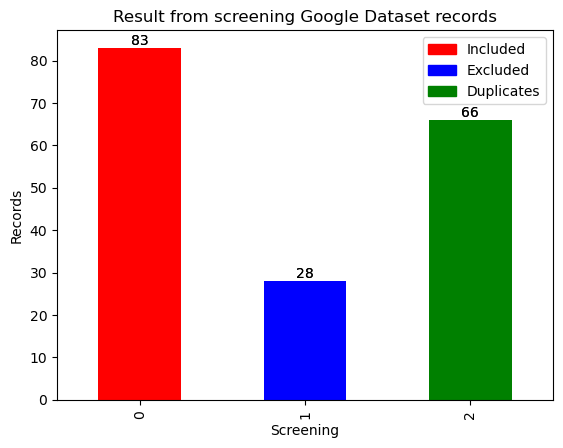

In [8]:
ax = df_exclude.plot.bar(x='Screening', y='Title', legend=False, color=['red','blue','green'], title='Result from screening Google Dataset records', ylabel='Records', xlabel='Screening')

#add legend with screening description:
ax.bar_label(ax.containers[0])
include_patch = mpatches.Patch(color='red', label='Included')
exclude_patch = mpatches.Patch(color='blue', label='Excluded')
no_access_patch = mpatches.Patch(color='green', label='Duplicates')
ax.legend(handles=[include_patch, exclude_patch, no_access_patch])
ax.bar_label(ax.containers[0])

In [9]:
#open the screened results in a dataframe:
df_datasets = pd.read_csv('../thesis/GoogleDataset_Datasets.csv')

In [12]:
df_datasets

,Dataset,Source
0,Belarus,https://drive.google.com/file/d/1MinxZjUH06VMy...
1,BIMCV-COVID19+,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...
2,BRAX,https://physionet.org/content/brax/1.1.0/
3,CANDID-PTX,https://figshare.com/articles/dataset/CANDID-P...
4,Chest x-ray disease images,https://www.kaggle.com/datasets/parsagouran/ch...
5,Chest X-Rays - Covid19 Pakistan,https://data.mendeley.com/datasets/fvp7m8c9ss
6,Chest X-Rays Dataset,https://datasetsearch.research.google.com/sear...
7,CHEST-XRAY-PNEUMONIA,https://ieee-dataport.org/documents/chest-xray...
8,ChestX-ray14,https://nihcc.app.box.com/v/ChestXray-NIHCC
9,ChestX-ray8,https://nihcc.app.box.com/v/ChestXray-NIHCC


In [11]:
df_datasets

,Dataset,Source
0,Belarus,https://drive.google.com/file/d/1MinxZjUH06VMy...
1,BIMCV-COVID19+,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...
2,BRAX,https://physionet.org/content/brax/1.1.0/
3,CANDID-PTX,https://figshare.com/articles/dataset/CANDID-P...
4,Chest x-ray disease images,https://www.kaggle.com/datasets/parsagouran/ch...
5,Chest X-Rays - Covid19 Pakistan,https://data.mendeley.com/datasets/fvp7m8c9ss
6,Chest X-Rays Dataset,https://datasetsearch.research.google.com/sear...
7,CHEST-XRAY-PNEUMONIA,https://ieee-dataport.org/documents/chest-xray...
8,ChestX-ray14,https://nihcc.app.box.com/v/ChestXray-NIHCC
9,ChestX-ray8,https://nihcc.app.box.com/v/ChestXray-NIHCC


In [13]:
#datasets identified:
df_datasets.count()

Dataset    44
Source     44
dtype: int64